In [20]:
import sys 
sys.version

'3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]'

In [1]:
import pandas as pd
import numpy as np


from sklearn.linear_model import LinearRegression

# 시각화 모듈 import
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## 그래프 한글 폰트 패치
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc('font',family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system')

In [3]:
df = pd.read_excel('../Data/지역_위치별(주유소).xls')

In [4]:
df.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [5]:
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1548,1345,-
1,서울특별시,SK서광주유소,서울 강남구 역삼로 142 (역삼동),SK에너지,02-562-4855,Y,1765,1565,1365,990
2,서울특별시,현대오일뱅크㈜ 직영 도곡셀프주유소,서울특별시 강남구 남부순환로 2718 (도곡동),현대오일뱅크,02-529-5101,Y,1780,1566,1361,-
3,서울특별시,(주)정원이디에쓰 산성주유소,서울 강남구 헌릉로 730 (세곡동),GS칼텍스,02-2226-4963,Y,-,1568,1365,-
4,서울특별시,현대오일뱅크(주)유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,02-3462-5215,N,1805,1586,1384,1060


In [6]:
df.shape

(502, 10)

In [7]:
# '-' -> NaN

df['고급휘발유'] = df['고급휘발유'].replace('-',np.nan)
df['휘발유'] = df['휘발유'].replace('-',np.nan)
df['경유'] = df['경유'].replace('-',np.nan)
df['실내등유'] = df['실내등유'].replace('-',np.nan)

In [8]:
## 결측치 확인

df.isnull().sum()

지역         0
상호         0
주소         0
상표         0
전화번호       0
셀프여부       0
고급휘발유     98
휘발유        0
경유         0
실내등유     314
dtype: int64

In [9]:
# Object -> numeric

df['고급휘발유'] = pd.to_numeric(df['고급휘발유'], errors='coerce')
df['실내등유'] = pd.to_numeric(df['실내등유'], errors='coerce')

In [10]:
# 고급휘발유,휘발유,경유 상관관계 분석

df_corr = df[['고급휘발유','휘발유','경유','실내등유']]

# 상관계수 행렬
df_matrix = df_corr.corr()
df_matrix

,고급휘발유,휘발유,경유,실내등유
고급휘발유,1.000000,0.954455,0.959348,0.616384
휘발유,0.954455,1.000000,0.988903,0.572812
경유,0.959348,0.988903,1.000000,0.561246
실내등유,0.616384,0.572812,0.561246,1.000000


In [11]:
# 고급휘발유와 나머지 변수들의 상관관계 분석

df_corr_2 = df[['휘발유','경유','실내등유']]
df_corr_2.corrwith(df['고급휘발유'])

휘발유     0.954455
경유      0.959348
실내등유    0.616384
dtype: float64

C:\Users\Playdata\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Playdata\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Playdata\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

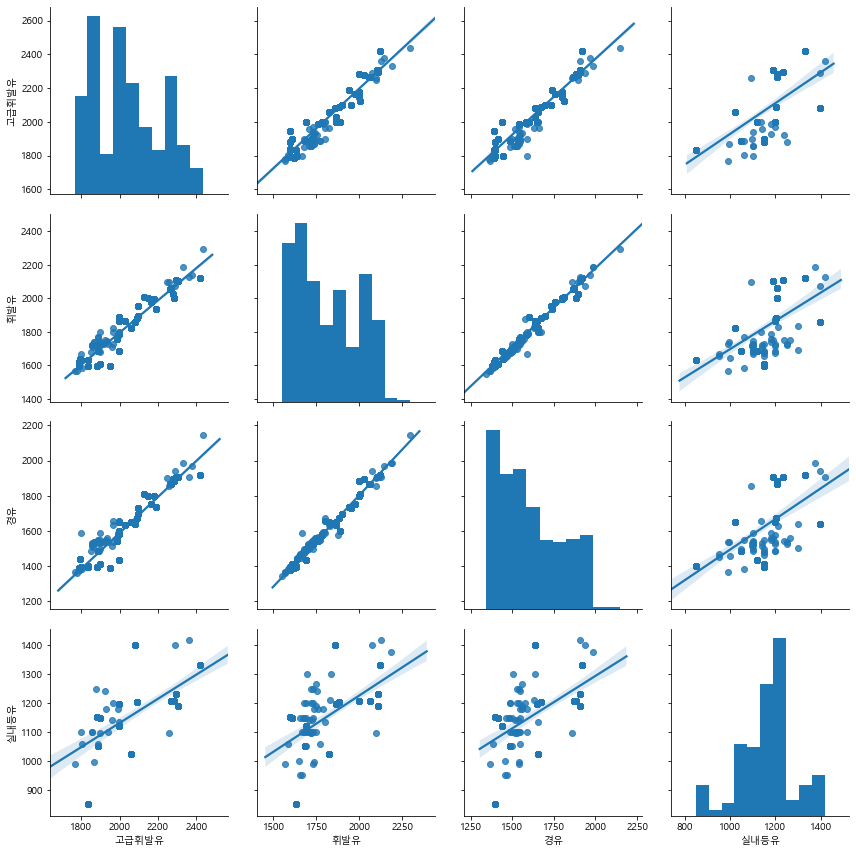

In [12]:
# 상관관계 시각화

# pairplot
sns.pairplot(df, vars=['고급휘발유','휘발유','경유','실내등유'],kind='reg',size=3)
plt.show

In [13]:
# 회귀 모델 생성

model = LinearRegression() 

In [14]:
# x , y setting
x = []
y = []


df_train = df.dropna(axis=0)
    
for j in range(len(df_train)):
    tmp_x = []
    tmp_x.append(df_train[['휘발유','경유']].values[j][0])
    tmp_x.append(df_train[['휘발유','경유']].values[j][1])
#     tmp_x.append(df_train[['휘발유','경유']].values[j][2])
    x.append(tmp_x)
    

for i in range(len(df_train)):
    tmp_y = []
    tmp_y.append(df_train['고급휘발유'].values[i])
    y.append(tmp_y)



In [15]:
# model 학습
model = model.fit(x,y)
# test
result = model.predict([[1556.0,1361.0]])
print(result)

[[1797.21329664]]


In [16]:
# df_test => 고급휘발유가 nan값인 data set

df_test = df[df['고급휘발유'].notnull() == False]

In [17]:
# 회귀모델 활용 결측값 예측

res_list = []

for rl in range(len(df_test)):
    tmp=[]
    tmp.append(df_test['휘발유'].iloc[rl])
    tmp.append(df_test['경유'].iloc[rl])         
    res_list.append(tmp)
    
res_tmp = []
for q in range(len(res_list)):
    tmp = []
    res_tmp.append(model.predict([res_list[q]]))

res = []
for i in range(len(res_tmp)):
    res.append(res_tmp[i][0][0])

df_test['고급휘발유'] = res

C:\Users\Playdata\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
df_test.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,1787.675004,1548,1345,NaN
3,서울특별시,(주)정원이디에쓰 산성주유소,서울 강남구 헌릉로 730 (세곡동),GS칼텍스,02-2226-4963,Y,1806.738708,1568,1365,NaN
5,서울특별시,(주)한진 도곡주유소,서울특별시 강남구 도곡로 162 (도곡동),S-OIL,02-2058-3024,N,1828.426088,1590,1390,NaN
6,서울특별시,방죽주유소,서울특별시 강남구 밤고개로 215 (율현동),S-OIL,02-459-3434,Y,1829.605493,1595,1380,NaN
12,서울특별시,자곡셀프주유소,서울특별시 강남구 밤고개로 120 (자곡동),SK에너지,02-445-5841,Y,1842.953307,1608,1397,NaN


In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model_ols = smf.ols(formula = '고급휘발유 ~ 휘발유+경유', data = df_train) # smf(statsmodel의 ols(최소제곱법)을 사용하여 회귀모형 생성 ) #Formula = '종속변수 ~ 독립변수
result = model_ols.fit() # 모형 적합화
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  고급휘발유   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     961.3
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           1.89e-88
Time:                        15:07:25   Log-Likelihood:                -851.00
No. Observations:                 159   AIC:                             1708.
Df Residuals:                     156   BIC:                             1717.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    360.6818     56.627      6.369      0.000     248.828     472.536
휘발유            0.7141      0.145      4.914      0.000       0.427       1.001
경유             0.2391      0.137      1.743      0.083      -0.032       0.510
==============================================================================
Omnibus:                        1.387   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                1.222
Skew:                           0.029   Prob(JB):                        0.543
Kurtosis:                       2.574   Cond. No.                     3.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""